## <font color='darkblue'>Autoencoders</font>
([course link](https://www.udemy.com/course/unsupervised-deep-learning-in-python/learn/lecture/5106570#overview)) An autoencoder is a neural network that learns to compress and reconstruct data. It consists of an encoder, a decoder, and a loss function. <b>The encoder takes as input a dataset of data and outputs a [latent representation](https://en.wikipedia.org/wiki/Latent_space) of that data</b>. The decoder then takes the latent representation as input and outputs a reconstruction of the original data. The loss function measures the difference between the original data and the reconstruction, and the autoencoder learns to minimize this loss over time.

## <font color='darkblue'>Denosing Autoencoders</font>
([course link](https://www.udemy.com/course/unsupervised-deep-learning-in-python/learn/lecture/5106626#overview))

## <font color='darkblue'>Stacked Autoencoders</font>
([course link](https://www.udemy.com/course/unsupervised-deep-learning-in-python/learn/lecture/5106630#overview))

## <font color='darkblue'>Autoencoders in Code</font>
([course link](https://www.udemy.com/course/unsupervised-deep-learning-in-python/learn/lecture/7342180#overview))
* [`autoencoder_tf.py`](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/unsupervised_class3/autoencoder_tf.py)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(f'X_train.shape={X_train.shape}')
print(f'X_test.shape={X_test.shape}')
print(f'tf version={tf.__version__}')

2023-03-05 07:02:04.936811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 07:02:05.102713: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-05 07:02:05.102743: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-05 07:02:06.093363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

X_train.shape=(60000, 784)
X_test.shape=(10000, 784)
tf version=2.11.0


In [18]:
import autoencoder_tf

model = autoencoder_tf.Autoencoder(784, 200)
history = model.fit(X_train, X_test, epochs=30)

Epoch 1/30
938/938 [==============================] - 6s 5ms/step - loss: 0.1255 - val_loss: 0.0810
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0755 - val_loss: 0.0711
Epoch 3/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0699 - val_loss: 0.0683
Epoch 4/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0680 - val_loss: 0.0671
Epoch 5/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0669 - val_loss: 0.0663
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0663 - val_loss: 0.0658
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0659 - val_loss: 0.0656
Epoch 8/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0656 - val_loss: 0.0653
Epoch 9/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0654 - val_loss: 0.0651
Epoch 10/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0652 - val_loss: 0.0651

dict_keys(['loss', 'val_loss'])


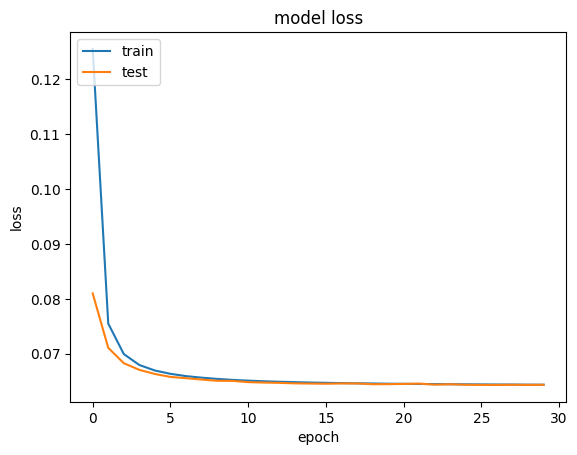

In [20]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

After 30 epochs, the autoencoder seems to reach a stable train/validation loss value of about 0.09. We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.

In [16]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = model.encoder.predict(X_test)
decoded_imgs = model.decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


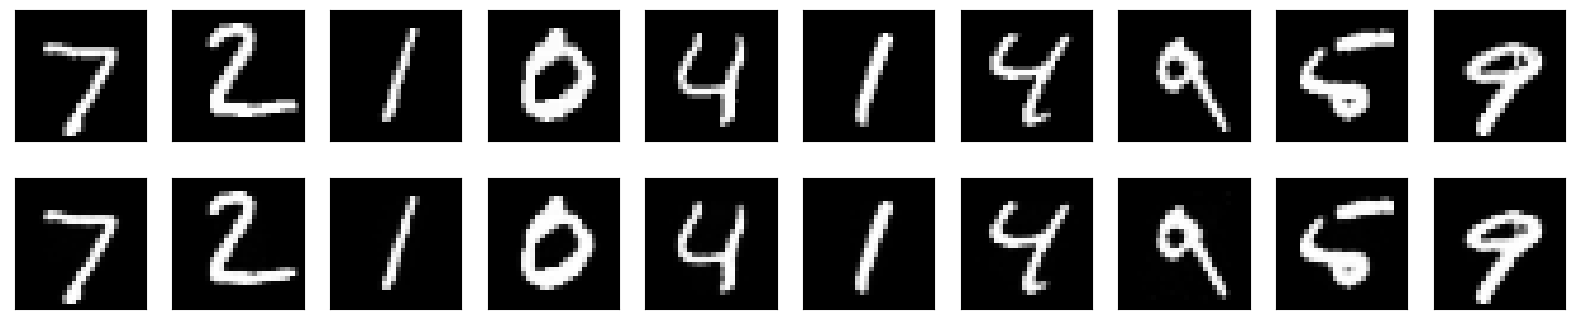

In [17]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Here's what we get. The top row is the original digits, and the bottom row is the reconstructed digits. We are losing quite a bit of detail with this basic approach.

## <font color='darkblue'>Cross Entropy vs KL-Diverence</font>
([course link](https://www.udemy.com/course/unsupervised-deep-learning-in-python/learn/lecture/5359144#questions))

## <font color='darkblue'>Supplement</font>
* [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
* [Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)